# 1. Libraries & Sample Data
The first step is to load our Python Libraries and download the sample data. The dataset represents Apple stock price (1d bars) for the year 2010

In [7]:
# Load Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML
# for dataframe display
pd.set_option("display.max_rows", None)
def display_df(df):
    # Puts the scrollbar next to the DataFrame
    display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" + df.to_html() + "</div>"))

In [8]:
# Download Sample Data AAPL_2009-2010_6m_RAW_1d.csv
data = pd.read_csv("AAPL_2009-2010_6m_RAW_1d.csv", parse_dates=["Date"], index_col="Date")
data = data.sort_index()

# 2. Exploratory Data Analysis
Next, we want to analyze our data. Display the data as a dataframe, and plot some relevant data so you can get an idea of what our dataset looks like.

In [9]:
# Display as Dataframe
display_df(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,5.893720e+08
2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,8.123668e+08
2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,6.362412e+08
2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08
2009-04-07,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-08,4.122500,4.171071,4.092143,4.154286,3.512252,4.556300e+08
2009-04-09,4.229286,4.285714,4.212857,4.270357,3.610385,5.307568e+08
2009-04-13,4.286071,4.320714,4.250000,4.293571,3.630010,3.892364e+08
2009-04-14,4.270357,4.291786,4.187500,4.225357,3.572339,4.546220e+08


In [10]:
# Index data by Date
data.index = pd.to_datetime(data.index)

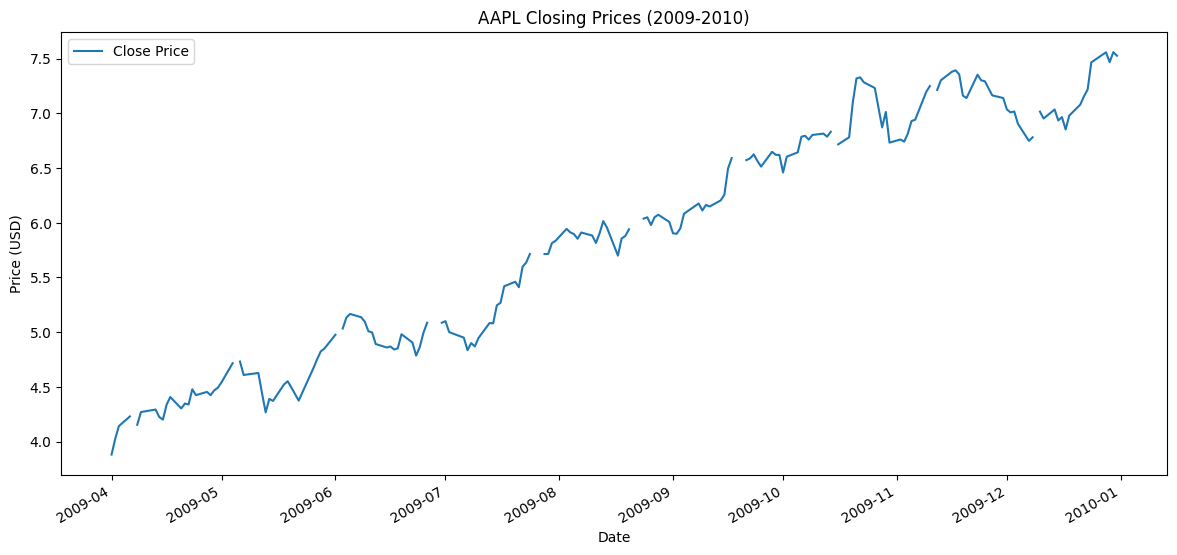

In [11]:
# Plot the Close Data
plt.figure(figsize=(12, 6))
plt.title("AAPL Closing Prices (2009-2010)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
data['Close'].plot(label='Close Price')
plt.legend()
plt.show()

# 3. Data Cleaning
Next, we need to clean our data for training our model. This requires removal of NaN values.

In [12]:
# Check for null values
if data.isnull().values.any():
    print("Data contains null values.")
    print(data.isnull().sum())
else:
    print("Data does not contain null values.")

Data contains null values.
Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64


In [15]:
# forward fill missing values
data.ffill(inplace=True)

In [16]:
# Check for null values to ensure it is now zero
if data.isnull().values.any():
    print("Data still contains null values after forward fill.")
else:
    print("Data does not contain null values after forward fill.")

Data does not contain null values after forward fill.


In [17]:
data.reset_index().to_csv('e2_data_CLEAN.csv')

# 4. Feature Definition
Now that we have cleaned our stock data, we can define some financial indicators, or "features" to train our model on. We will be calculating some popular indicators: 20-day Close Moving Average, 5-day Close Moving Average, 20-day Close Bollinger Bands, and 20-day Historical Volatility of Log Returns of Close Price. 

In [18]:
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['STD20'] = data['Close'].rolling(window=20).std()
data['BB_upper'] = data['MA20'] + 2 * data['STD20']
data['BB_lower'] = data['MA20'] - 2 * data['STD20']
data['Log_Ret'] = np.log(data['Close'] / data['Close'].shift(1))
data['Vol20'] = data['Log_Ret'].rolling(window=20).std() * np.sqrt(252)  # Annualized volatility
display_df(data)

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
Date,,,,,,,,,,,,,
2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,5.893720e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,8.123668e+08,NaN,NaN,NaN,NaN,NaN,0.036318,NaN
2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,6.362412e+08,NaN,NaN,NaN,NaN,NaN,0.028686,NaN
2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08,NaN,NaN,NaN,NaN,NaN,0.020987,NaN
2009-04-07,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08,4.102071,NaN,NaN,NaN,NaN,0.000000,NaN
2009-04-08,4.122500,4.171071,4.092143,4.154286,3.512252,4.556300e+08,4.156571,NaN,NaN,NaN,NaN,-0.018146,NaN
2009-04-09,4.229286,4.285714,4.212857,4.270357,3.610385,5.307568e+08,4.205571,NaN,NaN,NaN,NaN,0.027557,NaN
2009-04-13,4.286071,4.320714,4.250000,4.293571,3.630010,3.892364e+08,4.235786,NaN,NaN,NaN,NaN,0.005421,NaN
2009-04-14,4.270357,4.291786,4.187500,4.225357,3.572339,4.546220e+08,4.234786,NaN,NaN,NaN,NaN,-0.016015,NaN


In [19]:
# Remove rows with MA=NaN
data = data.dropna(subset=['MA5', 'MA20'])

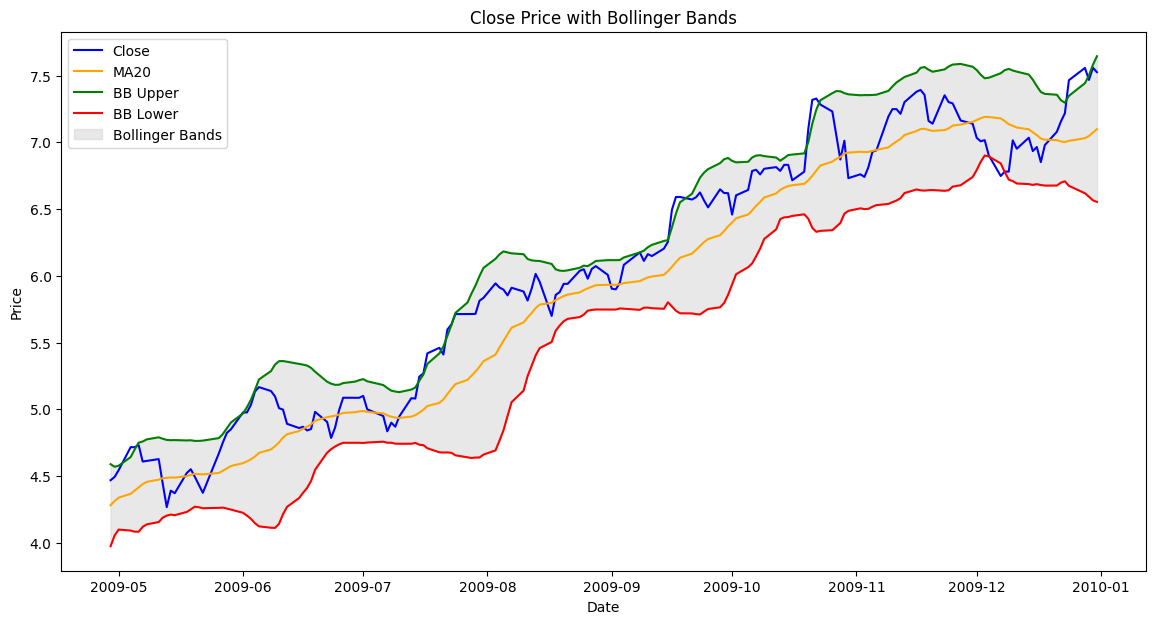

In [ ]:
# Plot Features on One Chart: Close, MA20, BB Upper, BB Lower
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close', color='blue')
plt.plot(data.index, data['MA20'], label='MA20', color='orange')
plt.plot(data.index, data['BB_upper'], label='BB Upper', color='green')
plt.plot(data.index, data['BB_lower'], label='BB Lower', color='red')
plt.fill_between(data.index, data['BB_upper'], data['BB_lower'], 
                 color='lightgray', alpha=0.5, label='Bollinger Bands')
plt.title('Close Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

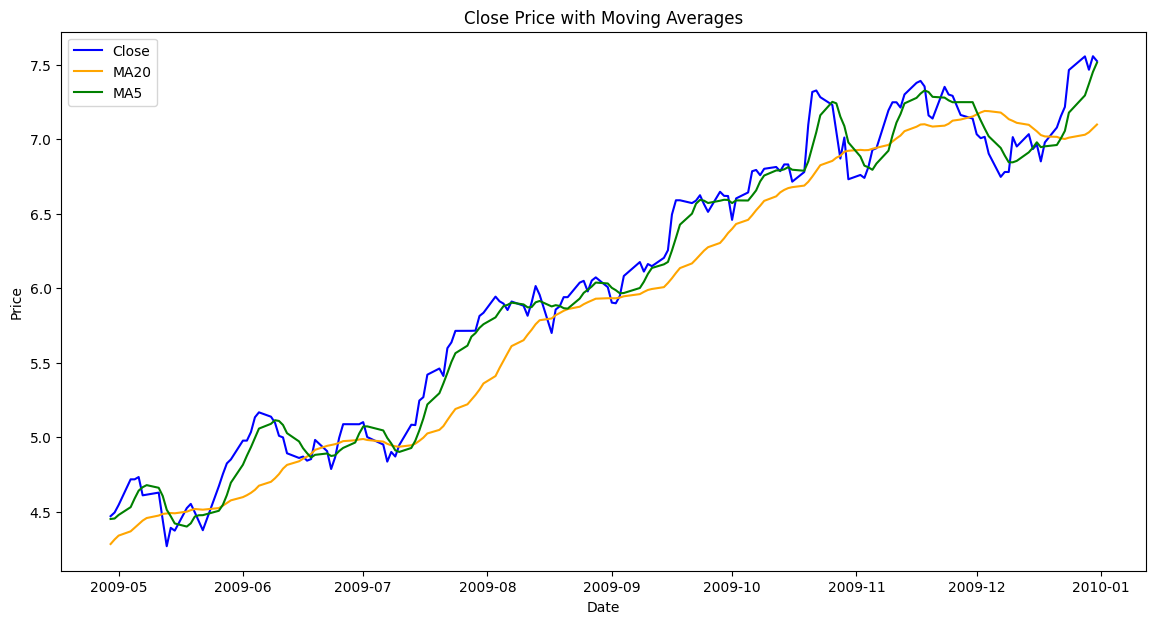

In [21]:
# Plot Features on One Chart: Close, MA20, MA5
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close', color='blue')
plt.plot(data.index, data['MA20'], label='MA20', color='orange')
plt.plot(data.index, data['MA5'], label='MA5', color='green')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

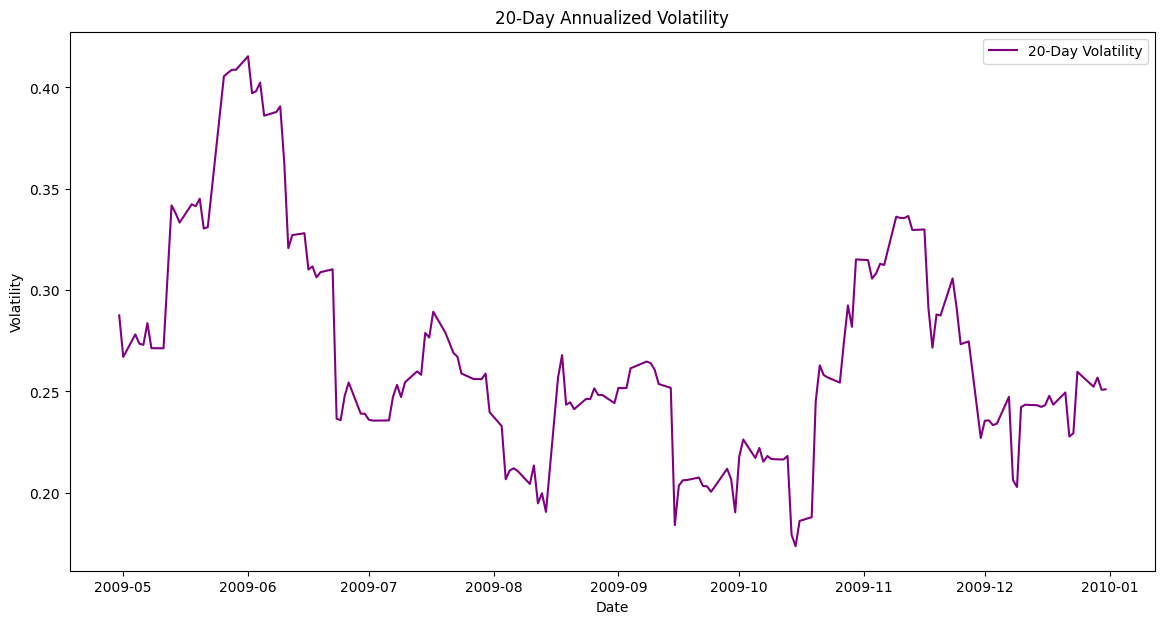

In [22]:
# Plot Features: Volatility
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Vol20'], label='20-Day Volatility', color='purple')
plt.title('20-Day Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()